## Imports

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# custom imports
import sys
sys.path.append('../../')
from allen_vc.plots import plot_regression_line
from allen_vc.stats import mixedLM

print("Packages Imported!")

Packages Imported!


## Settings

In [4]:
# set paths
PROJECT_PATH = "D:/visual_encoding" # shared results directory
MANIFEST_PATH = 'D:/datasets/allen_vc' # path to manifest file and local dataset

# matplotlib and figure appearance settings
plt.style.use(f'../../stylelib/sfn_2023.mplstyle')

## Helper functions

In [ ]:
# calc EI balance from DataFrame
def calc_EI(df):
    E = df.loc[df['cell_type'] == 'excitatory', 'mean_firing_rate']
    I = df.loc[df['cell_type'] == 'inhibitory', 'mean_firing_rate']
    
    return E/I

## Load data

In [6]:
# spont
spont = pd.read_csv(f'{PROJECT_PATH}/data/spike_stats/by_cell_type/pop_metrics/spontaneous_stationary.csv')

# movie (filter for stationary)
movie = pd.read_csv(f'{PROJECT_PATH}/data/spike_stats/by_cell_type/pop_metrics/natural_movie_one_more_repeats.csv')
movie = movie.loc[~movie['running']]

# shuffled (filter for stationary)
shuffled = pd.read_csv(f'{PROJECT_PATH}/data/spike_stats/by_cell_type/pop_metrics/natural_movie_one_shuffled.csv')
shuffled = shuffled.loc[~shuffled['running']]

Take a look at cell_type unit counts

In [25]:
spont.groupby(['cell_type'])['unit_count'].sum()

cell_type
excitatory    34066
inhibitory     7294
undefined      4088
Name: unit_count, dtype: int64

In [26]:
movie.groupby(['cell_type'])['unit_count'].sum()

cell_type
excitatory    32234
inhibitory     7078
undefined      3987
Name: unit_count, dtype: int64

In [27]:
shuffled.groupby(['cell_type'])['unit_count'].sum()

cell_type
excitatory    10862
inhibitory     2271
undefined      1506
Name: unit_count, dtype: int64

## Main

In [32]:
# filter for only E or I units
spont_EI = spont.loc[spont['cell_type'] != 'undefined']
movie_EI = movie.loc[movie['cell_type'] != 'undefined']
shuffled_EI = shuffled.loc[shuffled['cell_type'] != 'undefined']

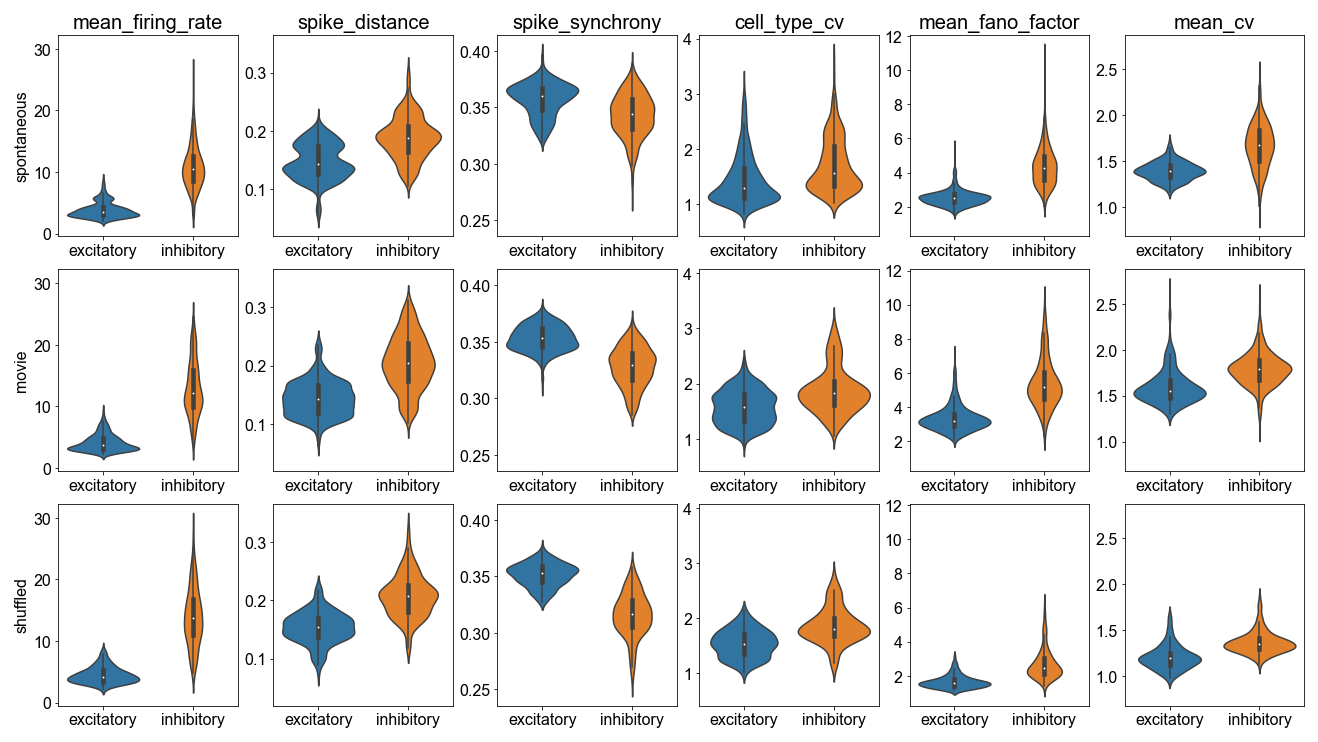

In [37]:
# compare spike metrics between excitatory and inhibitory populations

dfs = {'spontaneous': spont_EI, 'movie': movie_EI, 'shuffled': shuffled_EI}
metrics = ['mean_firing_rate', 'spike_distance', 'spike_synchrony','cell_type_cv', 'mean_fano_factor', 'mean_cv']
fig, ax = plt.subplots(3, len(metrics), figsize=(18, 10), sharey='col')


for i, df_name in enumerate(dfs.keys()):
    for j, metric in enumerate(metrics):

        sns.violinplot(data=dfs[df_name], x='cell_type', y=metric, ax=ax[i, j])
        ax[i, j].set_xlabel('')
        
        if i == 0:
            ax[i,j].set_title(metric)
            
        if j == 0:
            ax[i, j].set_ylabel(df_name)
        else:
            ax[i, j].set_ylabel('')
        

In [ ]:
# calculate E/I balance per epoch

# df.groupby(['session_id', 'epoch_idx']).transform()

In [ ]:
# plot E:I balance vs. exponent (separately and on same plot for each state)
